# Описание задачи

### Экономика преступления и наказания 
(Гэри Беккер - нобелевский лауреат по экономике) 

Преступность можно рассматривать как специфический рынок, на котором существует спрос и предложение. Предложение определяется готовностью преступников совершать правонарушения и зависит от таких факторов, как строгость наказания или легальных альтернатив заработка. Спрос формируется из потребности людей в результатах нелегальной деятельности, например, спрос на наркотини или краденое имущество.

**Формула Беккера**

$(1-\pi )\cdot U({{W}_{C}})-\pi S>U({{W}_{L}})$ 

$\pi$ - вероятность быть пойманным; 

$U$ - функция полезности индивида;

$S$ - санкции, помесённые случае пойми (например, штраф); 

${W}_{C}$ - доходы от преступной деятельности;

${W}_{L}$-доходы от легальной деятельности.

Левая часть неравенства характеризует то, что связано с преступностью, правая-полезность от законного заработка. Логично, что если неравенство будет выполнено, индивид при прочих равных предпочтет нарушить закон.

**Основные факторы образования равновесного уровня преступности:**

- **Готовность людей совершать преступления ради выгоды**: вероятность ареста, осуждения и наказания; меры наказания; доходы от альтернативных видов легальной и нелегальной деятельности: риск безработицы; изначальный уровень благосостояния. - **Поведение потенциальных жертв и потребителей нелегальных товаров**; величина спроса на нелегальные товары; спрос на средства защиты (сейфы, сигнализацию, охрану). 
- **Меры, принимаемые государством**: осуществляя поимку преступников, государство вводит своеобразный налог на преступные виды деятельности, выражаемые в риске быть пойманным. 

В частности и концепции Беккера следует, что на уровень преступности влияют размеры среднего заработка и уровень безработицы.

### Задача 1: Baseline model  

1) Из открытых источников собрать данные в разбивке "регион РФ + год":
- по уровню преступности (кражи, экономические виды преступлений и т.п.);
- по уровню безработицы;
- по уровню средних заработков.

2) Создать таблицу, где каждая строка содержит данные по одному региону за один год (Регион+год), а в столбцах содержатся значения переменных:

- За независимые переменные взять безработицу уровень заработка;
- За целевую переменную взять уровень преступности.

3) Разбить выборку на train и test и обучить модель регрессии.

4) Проверить качество модели и сделать вывод: работает ли теория Беккера на этих данных?

### Задача 2: User model 

Самостоятельно сформулировать критерии описанные задаче 1 (пп. 1-4). 

Построить модель которая предсказывает **уровень преступности** по различным переменным (набор переменных определить самостоятельно).

>

........................................................................................

# Задача 1: Baseline model 

## Данные 

**Независимые переменные:**
- Уровень безработицы http://gks.ru/bgd/regl/B18_61/
    - Численность безработных 2006-2017 гг. - https://gks.ru/bgd/regl/B18_61/IssWWW.exe/Stg/pril/r_5.xls
    - Численность рабочей силы 2006-2017 гг. - https://gks.ru/bgd/regl/B18_61/IssWWW.exe/Stg/pril/r_1.xls
    - Безработица за 2018г. - https://www.gks.ru/bgd/free/B04_03/IssWWW.exe/Stg/d04/55.htm
   

- Среднедушевые денежные доходы  
    -  2009-2018 гг. - https://www.gks.ru/free_doc/new_site/population/urov/urov_11sub.htm
    -  2013-2018 гг. - https://gks.ru/storage/mediabank/urov_11subg-nm.xls

**Целевая переменная:**
- Число преступлений экономической направленности 2011-2018 гг. - http://crimestat.ru/offenses_table
- Численность населения https://showdata.gks.ru/report/278930/

**Описание таргета:** Отражает количество преступлений экономической направленности, которые были зарегистрированы правоохранительными органами в течение отчётного периода. Преступления экономической направленности посягают на экономические интересы государства, отдельных групп граждан. В соответствии с УК РФ к преступлениям экономической направленности относятся такие преступления как: незаконная банковская деятельность, лжепредпринимательство, легализация (отмывание) денежных средств или иного имущества, приобретенных незаконным путем, незаконное получение кредита, злостное уклонение от погашения кредиторской задолженности, преднамеренное банкротство, коммерческий подкуп, уклонение от уплаты налогов, контрабанда и ряд других преступлений.

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings. filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

## 1.1 Сбор витрины

### 1.1.1 Таргет

In [2]:
target = pd.read_excel('Data_1task/economic crime.xlsx')
target.columns = ['region', *target.columns[1:]]
target.head()

,region,2011,2012,2013,2014,2015,2016,2017,2018
0,Алтайский край,2430.0,1749.0,1607.0,1397,1297,1052.0,973.0,1031.0
1,Амурская область,429.0,276.0,356.0,309,386,496.0,499.0,448.0
2,Архангельская область,1344.0,1344.0,1042.0,907,1189,954.0,992.0,1113.0
3,Астраханская область,2006.0,1760.0,1368.0,1084,1054,820.0,923.0,905.0
4,Белгородская область,2004.0,1533.0,1259.0,943,802,888.0,783.0,793.0


In [3]:
def del_words(data, column=None, words=None):
    '''
    Delete words from column values.
    
    Arguments:
        data: pd.DataFrame
        column: str
        words: list of strings
    '''
    data = data.copy()
    if column==None:
        column = 'region'
    if words==None:
        words = ['\xa0','\n', '\t', 'авт.область', 'авт.округ', '-Кузбасс',
                 'автономный', 'автономная','- Кузбасс', '-Чувашия','- Чувашия',
                 'округ', 'область','автономный', 'Респ.',
                 'авт.', 'окр.', 'АО','ФО', 'федеральный',
                 'г.', 'обл.', 'Республика', 'край', ' ',]
    
    for i in range(len(data)):
        for word in words:
            if type(word)==str:
                data[column].iloc[i] = data[column].iloc[i].replace(word,'')

    return data

In [4]:
target = del_words(target)
target.head()

,region,2011,2012,2013,2014,2015,2016,2017,2018
0,Алтайский,2430.0,1749.0,1607.0,1397,1297,1052.0,973.0,1031.0
1,Амурская,429.0,276.0,356.0,309,386,496.0,499.0,448.0
2,Архангельская,1344.0,1344.0,1042.0,907,1189,954.0,992.0,1113.0
3,Астраханская,2006.0,1760.0,1368.0,1084,1054,820.0,923.0,905.0
4,Белгородская,2004.0,1533.0,1259.0,943,802,888.0,783.0,793.0


In [5]:
def prepare_target(data, main_column=None):
    '''
    Transform matrix |region|year1|year2|..| to vector |region_year|target| 
    
    Args: 
        data: pd.DataFrame
            region - year1 - year2 - year3 ...
        main_column: str
            ex: 'region'
    '''
    if main_column==None:
        main_column ='region'
    
    data = data.copy()
    
    new_data = pd.DataFrame()
    region_year = []
    target_vect = []
    
    for year in data.columns[1:]:
        for indx, region in enumerate(data[main_column]):
            region_year.append(region + '_' + str(year))
            target_vect.append(data[year].iloc[indx])
        
    new_data[main_column + '_year'] = region_year
    new_data['target'] = target_vect
    target_regions = data[main_column]
    target_years = data.columns[1:].values
    
    return new_data, target_regions, target_years

In [6]:
target_data, target_regions, target_years = prepare_target(target)
target_data

,region_year,target
0,Алтайский_2011,2430.0
1,Амурская_2011,429.0
2,Архангельская_2011,1344.0
3,Астраханская_2011,2006.0
4,Белгородская_2011,2004.0
...,...,...
755,Ямало-Ненецкий_2018,336.0
756,Ярославская_2018,650.0
757,Москва_2018,12997.0
758,Санкт-Петербург_2018,3196.0


### 1.1.2 Features

####  Данные по безработице за 2018

In [7]:
# Save only region, work_force, jobless
workers_2018 = pd.read_excel('Data_1task/workers 2018.xlsx', header = None).drop(labels=[2,4,5,6], axis=1)[5:]
workers_2018.columns = ['region', 'work_force', 'jobless']

workers_2018.head()

,region,work_force,jobless
5,Российская Федерация,75450,3673.4
6,NaN,NaN,NaN
7,Центральный федеральный округ,21272.8,616
8,Белгородская область,824.4,33.1
9,Брянская область,592.1,22.5


Проверяем пропуски

In [8]:
workers_2018[(workers_2018['work_force']!=workers_2018['work_force'])
           & (workers_2018['region']==workers_2018['region'])]

,region,work_force,jobless
57,,NaN,NaN
59,,NaN,NaN
61,,NaN,NaN
86,,NaN,NaN


Можно смело удалять пропуски. 

In [9]:
workers_2018.dropna(inplace=True)

In [10]:
def prepare_features(data, feature_name, target_years, main_column=None, year=None):
    '''
    Transform matrix |region|year1|year2|..| to vector |region_year|feature|
    
    Args: 
        data: pd.DataFrame
            region - year1 - year2 - year3 ...
        main_column: str
            ex: 'region'
    '''
    if main_column==None:
        main_column ='region'
    
    data = data.copy()
    
    new_data = pd.DataFrame()
    region_year = []
    feature_vect = []
    
    if (year!=None) and (year in target_years):
        for indx, region in enumerate(data[main_column]):
            region_year.append(region + '_' + str(year))
            feature_vect.append(data[feature_name].iloc[indx])
    
    if year==None:
        for year in data.columns[1:]:
            if int(year) in target_years:
                for indx, region in enumerate(data[main_column]):
                    region_year.append(region + '_' + str(year))
                    feature_vect.append(data[year].iloc[indx])
    
                
    new_data[main_column + '_year'] = region_year
    new_data[feature_name] = feature_vect
    
    return new_data    

Необходимо зачистить поле Регион от лишнего

In [11]:
workers_2018 = del_words(workers_2018, 'region')
workers_2018.head()

,region,work_force,jobless
5,РоссийскаяФедерация,75450,3673.4
7,Центральный,21272.8,616
8,Белгородская,824.4,33.1
9,Брянская,592.1,22.5
10,Владимирская,716.6,28


Наш признак это **уровень безработицы = jobless / work_forse**

In [12]:
jobless_2018 = pd.DataFrame()
jobless_2018['region'] = workers_2018['region']
jobless_2018['jobless'] = workers_2018['jobless']/workers_2018['work_force']
jobless_2018 = jobless_2018.reset_index(drop=True)
jobless_2018.head()

,region,jobless
0,РоссийскаяФедерация,0.0486865
1,Центральный,0.0289572
2,Белгородская,0.0401504
3,Брянская,0.0380003
4,Владимирская,0.0390734


In [15]:
jobless_vector_2018 = prepare_features(jobless_2018, 'jobless', target_years, year=2018)
jobless_vector_2018.head()

,region_year,jobless
0,РоссийскаяФедерация_2018,0.048687
1,Центральный_2018,0.028957
2,Белгородская_2018,0.040150
3,Брянская_2018,0.038000
4,Владимирская_2018,0.039073


Проверяем на наличие повторов

In [16]:
len(workers_2018['region'].unique()) != len(workers_2018['region'])

False

In [18]:
workers_2018['region'].unique()[:20]

array(['РоссийскаяФедерация', 'Центральный', 'Белгородская', 'Брянская',
       'Владимирская', 'Воронежская', 'Ивановская', 'Калужская',
       'Костромская', 'Курская', 'Липецкая', 'Московская', 'Орловская',
       'Рязанская', 'Смоленская', 'Тамбовская', 'Тверская', 'Тульская',
       'Ярославская', 'Москва'], dtype=object)

Могут возникнуть трудности при соединении таблиц по региону, нужно будет аккуратно применять JOIN !

#### Данные по безработице за 2006-2017

In [19]:
# Число безработных
jobless_2017 = pd.read_excel('Data_1task/jobless 2006-2017.xls', header = 2)
jobless_2017.columns = ['region', *jobless_2017.columns[1:]]

jobless_2017.head()

,region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Российская Федеpация,5250.2,4518.6,4697.0,6283.7,5544.2,4922.4,4130.7,4137.4,3889.373857,4263.926593,4243.491933,3966.521665
1,Центральный \nфедеральный округ,814.6,635.6,732.9,1193.0,960.8,857.6,658.9,697.8,655.053112,744.857056,754.994371,691.112283
2,Белгородская область,42.7,31.4,29.6,37.4,40.6,33.2,29.5,32.2,32.463161,32.811294,32.536688,32.139716
3,Брянская область,44.8,42.5,42.2,68.2,51.9,45.5,32.7,33.3,31.855165,28.972724,28.659656,27.012095
4,Владимирская область,86.3,53.7,44.9,66.5,46.6,44.3,34.1,29.2,32.860188,42.266309,40.959567,35.349335


In [23]:
jobless_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
region    94 non-null object
2006      92 non-null float64
2007      92 non-null float64
2008      92 non-null float64
2009      92 non-null float64
2010      92 non-null float64
2011      92 non-null float64
2012      92 non-null float64
2013      92 non-null float64
2014      92 non-null float64
2015      94 non-null float64
2016      94 non-null float64
2017      94 non-null float64
dtypes: float64(12), object(1)
memory usage: 9.9+ KB


In [24]:
jobless_2017.dropna(inplace=True)

In [25]:
# Число работоспособных
workers_2017 = pd.read_excel('Data_1task/workers 2006-2017.xls', header = 2)
workers_2017.columns = ['region', *workers_2017.columns[1:]]
workers_2017.head()

,region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Российская Федерация,74418.948940,75288.926784,75700.069987,75694.175420,75477.874045,75779.012869,75676.075858,75528.902929,75428.417426,76587.549126,76636.120060,76108.523294
1,Центральный \nфедеральный округ,20186.608202,20581.397112,20634.074044,20664.187014,20677.050534,20914.484725,21041.497013,21007.432789,21126.124997,21108.173043,21281.626008,21282.158549
2,Белгородская область,755.818542,732.096821,761.202496,791.390062,779.294733,766.737661,786.689143,809.765080,814.110921,806.387175,821.726016,823.189738
3,Брянская область,660.745423,659.166622,654.020421,636.526119,650.466519,644.309079,644.317992,638.478111,635.092863,624.361011,624.604048,612.251483
4,Владимирская область,797.333556,796.752006,786.164333,764.025850,761.835119,772.991039,776.341416,770.108065,758.513042,759.990705,736.671788,730.226840


Вычисляем уровень безработицы. Делим число безработных на число работоспособных.

In [26]:
jobless_calc = jobless_2017.copy()
for column in jobless_2017.columns[1:]:
    jobless_calc[column] = jobless_2017[column]/workers_2017[column]
jobless_calc = del_words(jobless_calc)
jobless_calc.head()

,region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,РоссийскаяФедеpация,0.070549,0.060017,0.062047,0.083014,0.073455,0.064957,0.054584,0.054779,0.051564,0.055674,0.055372,0.052117
1,Центральный,0.040353,0.030882,0.035519,0.057733,0.046467,0.041005,0.031314,0.033217,0.031007,0.035288,0.035476,0.032474
2,Белгородская,0.056495,0.042891,0.038886,0.047259,0.052098,0.043300,0.037499,0.039765,0.039876,0.040689,0.039596,0.039043
3,Брянская,0.067802,0.064475,0.064524,0.107144,0.079789,0.070618,0.050751,0.052155,0.050158,0.046404,0.045885,0.044119
4,Владимирская,0.108236,0.067399,0.057113,0.087039,0.061168,0.057310,0.043924,0.037917,0.043322,0.055614,0.055601,0.048409


In [27]:
jobless_vector_2017 = prepare_features(jobless_calc, 'jobless', target_years)
jobless_vector = pd.concat([jobless_vector_2017, jobless_vector_2018], axis=0)
jobless_vector = jobless_vector.reset_index(drop=True)
jobless_vector

,region_year,jobless
0,РоссийскаяФедеpация_2011,0.064957
1,Центральный_2011,0.041005
2,Белгородская_2011,0.043300
3,Брянская_2011,0.070618
4,Владимирская_2011,0.057310
...,...,...
733,Амурская_2018,0.058368
734,Магаданская_2018,0.045610
735,Сахалинская_2018,0.052593
736,Еврейская_2018,0.064935


#### Доход за 2009-2012

In [28]:
earn_2012 = pd.read_excel('Data_1task/earnings 2009-2012.xls', header=2).loc[:,['Unnamed: 0', '2011 год','2012 год']].drop(0).reset_index(drop=True)
earn_2012.columns = ['region','2011','2012']
earn_2012.dropna(inplace=True)
earn_2012 = del_words(earn_2012)
earnings_vector_2012 = prepare_features(earn_2012, 'earnings', target_years)

In [30]:
earnings_vector_2012

,region_year,earnings
0,РоссийскаяФедерация_2011,20780.0
1,Центральный_2011,27096.9
2,Белгородская_2011,18799.7
3,Брянская_2011,15347.6
4,Владимирская_2011,14312.2
...,...,...
175,Амурская_2012,21800.3
176,Магаданская_2012,36619.7
177,Сахалинская_2012,32721.2
178,Еврейская_2012,18450.3


#### Доход за 2013-2018

In [31]:
earn_2018 = pd.read_excel('Data_1task/earnings 2013-2018.xls', header=3).drop([0,99,100,101]).reset_index(drop=True)
earn_2018.columns = ['region', *earn_2018.columns[1:]]
earn_2018.dropna(inplace=True)
earn_2018 = del_words(earn_2018)
earnings_vector_2018 = prepare_features(earn_2018, 'earnings', target_years)

#### Соединяем доход за 2011-2012 и 2013-2018

In [32]:
earnings_vector = pd.concat([earnings_vector_2012, earnings_vector_2018], axis=0).reset_index(drop=True)
earnings_vector

,region_year,earnings
0,РоссийскаяФедерация_2011,20780.000000
1,Центральный_2011,27096.900000
2,Белгородская_2011,18799.700000
3,Брянская_2011,15347.600000
4,Владимирская_2011,14312.200000
...,...,...
715,Амурская_2018,30937.320387
716,Магаданская_2018,59774.387309
717,Сахалинская_2018,53783.432161
718,Еврейская_2018,24695.614133


#### Население

Нормируем абсолютное значение таргета на число жителей.

Будем считать что население в 2011 году не отличалось от 2012

In [33]:
citizens = pd.read_excel('Data_1task/citizens.xlsx', header=1).drop(columns=['Unnamed: 1']).drop(0)
citizens = citizens.dropna().reset_index(drop=True)
citizens.columns = ['region',*[2012 + i for i in range(7)]]
citizens.insert(1,2011,citizens[2012])
citizens = del_words(citizens)
citizens_vector = prepare_features(citizens, 'citizens', target_years)
citizens_vector

,region_year,citizens
0,РоссийскаяФедерация_2011,143201721.0
1,Центральный_2011,38608260.0
2,Белгородская_2011,1538529.0
3,Брянская_2011,1259041.0
4,Владимирская_2011,1426837.0
...,...,...
731,Амурская_2018,795809.0
732,Магаданская_2018,142663.0
733,Сахалинская_2018,489910.0
734,Еврейская_2018,160964.0


### 1.1.3 Join признаков и таргета

Предварительно данные почищены на повторы и ошибки в названии регионов c помощью вызова следующего выражения, которые находит не совпадающие элементы множества:

In [34]:
dif_set = set(jobless_vector['region_year']) ^ set(earnings_vector['region_year']) &\
          set(jobless_vector['region_year']) ^ set(target_data['region_year']) &\
          set(earnings_vector['region_year']) ^ set(target_data['region_year'])

extra_region=[]
for word in dif_set:
    extra_region.append(word.split('_')[0])

set(extra_region) 

{'Крым',
 'Крымский',
 'РоссийскаяФедеpация',
 'Севастополь',
 'СевернаяОсетия–Алания'}

In [35]:
extra_region=[]
for word in set(citizens_vector['region_year']) ^ set(target_data['region_year']):
    extra_region.append(word.split('_')[0])

set(extra_region) 

{'Крым', 'Крымский', 'Севастополь'}

Несовпадения сведены к минимуму. Промежутки смело удаляем

In [36]:
df_1 = pd.merge(jobless_vector, earnings_vector, on='region_year', how='outer')
df_2 = pd.merge(df_1, citizens_vector, on='region_year', how='outer')
df_2 = pd.merge(df_2, target_data, on='region_year', how='outer')
data_join = df_2.dropna().reset_index(drop=True)

# Normalize crime on number of citizens
baseline_data = data_join.copy()
baseline_data['target'] = data_join['target']/data_join['citizens']
baseline_data.drop(columns='citizens', inplace=True)
baseline_data

,region_year,jobless,earnings,target
0,Центральный_2011,0.041005,27096.900000,0.001318
1,Белгородская_2011,0.043300,18799.700000,0.001303
2,Брянская_2011,0.070618,15347.600000,0.001461
3,Владимирская_2011,0.057310,14312.200000,0.001696
4,Воронежская_2011,0.064521,15908.500000,0.001199
...,...,...,...,...
707,Амурская_2018,0.058368,30937.320387,0.000563
708,Магаданская_2018,0.045610,59774.387309,0.001556
709,Сахалинская_2018,0.052593,53783.432161,0.000623
710,Еврейская_2018,0.064935,24695.614133,0.000596


Итак, данные получены и обработаны, перейдем к анализу данных.

# 1.2 Визуальный анализ

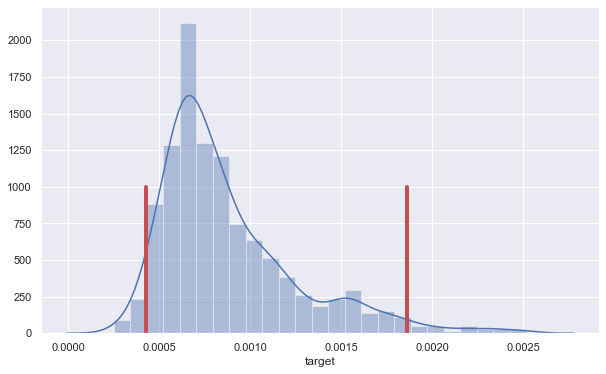

In [37]:
q_025 = np.quantile(baseline_data['target'], 0.025)
q_975 = np.quantile(baseline_data['target'], 0.975)

plt.figure(figsize=(10,6))
sns.distplot(baseline_data['target'])
plt.plot([q_025,q_025], [0,1000], 'r', lw=4)
plt.plot([q_975,q_975], [0,1000], 'r', lw=4)
plt
plt.show()

Распределение имеет тяжелый хвост, что может говорить о неравномерности распределения уровня преступности, раскрываемости преступлений, благонадежности населения по регионам России. 

Оставим 95% данных для построения модели. Остальные данные считаем выбросами, на которых модель будет переобучаться и давать плохой R2 score.

In [38]:
selected_indicies = baseline_data['target'][(baseline_data['target']>q_025)&(baseline_data['target']<q_975)].index

X = baseline_data[['jobless', 'earnings']].values[selected_indicies]
y = baseline_data['target'][selected_indicies]

# 1.3 Построение модели

Возьмем несколько стандартных моделей регрессии, зафиксируем random_state.

Для проверки качетсва моделей изпользуем R2 score на 5 случайных подвыборках.

In [39]:
def build_models(X, y):
    '''
    Train models on X, y with train_test_split.
    Return mean R2 score for each estimator from list on 5 random folds:
                      ['XGBRegressor',
                       'RandomForestRegressor',
                       'Lasso',
                       'Ridge',
                       'LinearRegression']
    Arguments:
        X: array-like
        y: 1-d array
    '''
    xgb = XGBRegressor(objective='reg:squarederror',n_jobs=-1, n_estimators=100, random_state=0)
    rf = RandomForestRegressor(200, n_jobs=-1, random_state=0)
    lasso = Lasso(random_state=0)
    ridge = Ridge(random_state=0)
    lin_reg = LinearRegression(n_jobs=-1)

    estimators = [xgb, rf, lasso, ridge, lin_reg]

    estimator_names = ['XGBRegressor',
                       'RandomForestRegressor',
                       'Lasso',
                       'Ridge',
                       'LinearRegression']

    n_folds = 5
    scaler = StandardScaler()
    dict_result = {'XGBRegressor':[], 
                  'RandomForestRegressor':[],
                  'Lasso':[],
                  'Ridge':[],
                  'LinearRegression':[]}


    for fold in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42+fold)

        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for linear_estimator, name_est in zip(estimators, estimator_names):
            linear_estimator.fit(X_train_scaled, y_train)
            prediction = linear_estimator.predict(X_test_scaled)
            current_r2 = r2_score(y_test, prediction)

            dict_result[name_est].append(current_r2)
    
    return pd.DataFrame(dict_result).mean()

In [40]:
%%time
baseline_result = build_models(X,y)
baseline_result

Wall time: 2.22 s


XGBRegressor             0.132007
RandomForestRegressor    0.130035
Lasso                   -0.004905
Ridge                    0.017020
LinearRegression         0.017020
dtype: float64

Средний R2 score лучше всех показал XGBRegressor, но в целом результат едва лучше константного прогноза средним. Это может говорить об сильной зашумленности данных, малом объеме или отсутсвии связи между выбранными признаками и целевой переменной.          

Усложним модель, добавим дополнительные признаки.

>

..........................................................................................

# Задача 2: User model

Добавим следующие признаки:
- Доля бедного населения https://www.gks.ru/storage/mediabank/2-4.doc
- Зарегистрированно всего преступлений, Всего нераскрытых преступлений в отчетном периоде - http://crimestat.ru/offenses_table
- Не раскрыто преступлений экономической направленности - http://crimestat.ru/offenses_table
- Стоимость фиксированного набора потребительских товаров и услуг https://www.fedstat.ru/indicator/31052
- Средние цены на первичном рынке жилья https://gks.ru/bgd/regl/B18_14p/IssWWW.exe/Stg/d03/22-08.doc
- Уровень образования https://www.gks.ru/bgd/regl/b12_14p/IssWWW.exe/Stg/d01/06-01.htm

### 2.1 Чтение доп. данных

#### 2.1.1 Численность бедного населения

In [41]:
poor_citizens = pd.read_excel('Data_2task/poor_citizens.xlsx', header=2)
poor_citizens = poor_citizens.dropna().reset_index(drop=True)
poor_citizens.columns = ['region',*[2011 + i for i in range(8)]]
poor_citizens = del_words(poor_citizens)
poor_citizens_vector = prepare_features(poor_citizens, 'poor_citizens', target_years)
poor_citizens_vector

,region_year,poor_citizens
0,РоссийскаяФедерация_2011,10.8
1,Белгородская_2011,7.6
2,Брянская_2011,12.6
3,Владимирская_2011,14.1
4,Воронежская_2011,9.4
...,...,...
683,Амурская_2018,15.6
684,Магаданская_2018,9.5
685,Сахалинская_2018,8.5
686,Еврейская_2018,23.7


#### 2.1.2 Вероятность избежать правосудия

In [42]:
unsolved_cr = pd.read_excel('Data_2task/all unsolved crimes.xlsx', header=0).drop(0)
unsolved_cr = unsolved_cr.dropna().reset_index(drop=True)
unsolved_cr.columns = ['region',*[2011 + i for i in range(8)]]
unsolved_cr = del_words(unsolved_cr)
unsolved_cr = prepare_features(unsolved_cr, 'unsolved_crimes', target_years)
unsolved_cr.head()

,region_year,unsolved_crimes
0,Алтайский_2011,16487.0
1,Амурская_2011,6967.0
2,Архангельская_2011,10901.0
3,Астраханская_2011,8155.0
4,Белгородская_2011,5745.0


In [43]:
open_cr = pd.read_excel('Data_2task/all open crimes.xlsx', header=0)
open_cr = open_cr.dropna().reset_index(drop=True)
open_cr.columns = ['region',*[2011 + i for i in range(8)]]
open_cr = del_words(open_cr)
open_cr = prepare_features(open_cr, 'open_crimes', target_years)
open_cr.head()

,region_year,open_crimes
0,Алтайский_2011,44940.0
1,Амурская_2011,18091.0
2,Архангельская_2011,24015.0
3,Астраханская_2011,22687.0
4,Белгородская_2011,15895.0


In [44]:
escape_prob = pd.merge(open_cr, unsolved_cr, on='region_year')
escape_prob['escape_prob'] = escape_prob['unsolved_crimes']/escape_prob['open_crimes']
escape_prob_vector = escape_prob[['region_year','escape_prob']]
escape_prob_vector

,region_year,escape_prob
0,Алтайский_2011,0.366867
1,Амурская_2011,0.385109
2,Архангельская_2011,0.453925
3,Астраханская_2011,0.359457
4,Белгородская_2011,0.361434
...,...,...
731,Южный_2018,0.457793
732,Ямало-Ненецкий_2018,0.461778
733,Ярославская_2018,0.531538
734,Москва_2018,0.659020


#### 2.1.3 Вероятность избежать правосудия по экономическим преступлениям

In [45]:
unsolv_eco_cr = pd.read_excel('Data_2task/unsolved economic crimes.xlsx', header=0).drop(0)
unsolv_eco_cr = unsolv_eco_cr.dropna().reset_index(drop=True)
unsolv_eco_cr.columns = ['region',*[2011 + i for i in range(8)]]
unsolv_eco_cr = del_words(unsolv_eco_cr)
unsolv_eco_cr = prepare_features(unsolv_eco_cr, 'unsolved_econ_crimes', target_years)
unsolv_eco_cr.head()

,region_year,unsolved_econ_crimes
0,Алтайский_2011,926.0
1,Амурская_2011,100.0
2,Архангельская_2011,368.0
3,Астраханская_2011,451.0
4,Белгородская_2011,464.0


In [46]:
escape_eco = pd.merge(unsolv_eco_cr, target_data, on='region_year')
escape_eco['escape_eco_prob'] = escape_eco['unsolved_econ_crimes']/escape_eco['target']
escape_eco_prob_vector = escape_eco[['region_year','escape_eco_prob']]
escape_eco_prob_vector

,region_year,escape_eco_prob
0,Алтайский_2011,0.381070
1,Амурская_2011,0.233100
2,Архангельская_2011,0.273810
3,Астраханская_2011,0.224826
4,Белгородская_2011,0.231537
...,...,...
731,Южный_2018,0.227023
732,Ямало-Ненецкий_2018,0.404762
733,Ярославская_2018,0.249231
734,Москва_2018,0.204509


Вводя данный признак есть вероятность переобучения, т.к. он вычисляется с помощью таргета. Нужно быть очень аккуратным (будем строить модель с ним и без него) 

#### 2.1.4 Стоимость фиксированного набора потребительских товаров и услуг

In [47]:
goods_prices = pd.read_excel('Data_2task/goods prices.xls', header=2).drop(0)
goods_prices = goods_prices.dropna().reset_index(drop=True)
goods_prices.columns = ['region',*[2011 + i for i in range(8)]]
goods_prices = del_words(goods_prices)
goods_prices = prepare_features(goods_prices, 'goods_prices', target_years)
goods_prices

,region_year,goods_prices
0,РоссийскаяФедерация_2011,9072.71
1,Центральный_2011,10104.83
2,Белгородская_2011,7862.71
3,Брянская_2011,8096.95
4,Владимирская_2011,8638.31
...,...,...
731,Амурская_2018,15243.09
732,Магаданская_2018,20569.99
733,Сахалинская_2018,17820.25
734,Еврейская_2018,17156.92


#### 2.1.4 Средние цены на первичном рынке жилья

In [48]:
hous_prices = pd.read_excel('Data_2task/hous prices.xlsx', header=0)
hous_prices = hous_prices.dropna().reset_index(drop=True)
hous_prices.columns = ['region',*[2011 + i for i in range(8)]]
hous_prices = del_words(hous_prices)
hous_prices = prepare_features(hous_prices, 'hous_prices', target_years)
hous_prices

,region_year,hous_prices
0,РоссийскаяФедерация_2011,43686.0
1,Центральный_2011,53088.0
2,Белгородская_2011,40383.0
3,Брянская_2011,29219.0
4,Владимирская_2011,38648.0
...,...,...
731,Амурская_2018,51722.0
732,Магаданская_2018,49605.0
733,Сахалинская_2018,73983.0
734,Еврейская_2018,36720.0


#### 2.1.5 Уровень образования (считаем не изменным)

In [49]:
education = pd.read_excel('Data_2task/education.xlsx', header=6)[['Unnamed: 0','высшее']]
education.columns = ['region','high_edu']
education = education.dropna().reset_index(drop=True)

for x_year in [2011 + i for i in range(8)]:
    education[x_year] = education['high_edu']
    
education.drop(columns='high_edu',inplace=True)
education = del_words(education)
education = prepare_features(education, 'high_edu', target_years)
education

,region_year,high_edu
0,РоссийскаяФедерация_2011,228.0
1,Центральный_2011,282.0
2,Белгородская_2011,209.0
3,Брянская_2011,180.0
4,Владимирская_2011,191.0
...,...,...
739,Амурская_2018,184.0
740,Магаданская_2018,239.0
741,Сахалинская_2018,195.0
742,Еврейская_2018,153.0


### 2.2 Объединение полученных признаков

In [50]:
objects_to_merge = [poor_citizens_vector, 
                    escape_prob_vector, 
                    escape_eco_prob_vector, 
                    goods_prices,
                    hous_prices,
                    education]

extra_features = poor_citizens_vector['region_year']
for obj in objects_to_merge:
    extra_features = pd.merge(extra_features, obj, on='region_year')
    
extra_features

,region_year,poor_citizens,escape_prob,escape_eco_prob,goods_prices,hous_prices,high_edu
0,РоссийскаяФедерация_2011,10.8,0.449121,0.204832,9072.71,43686.0,228.0
1,Белгородская_2011,7.6,0.361434,0.231537,7862.71,40383.0,209.0
2,Брянская_2011,12.6,0.287204,0.152800,8096.95,29219.0,180.0
3,Владимирская_2011,14.1,0.432756,0.193802,8638.31,38648.0,191.0
4,Воронежская_2011,9.4,0.419691,0.331306,9137.50,35134.0,215.0
...,...,...,...,...,...,...,...
659,Амурская_2018,15.6,0.401403,0.247768,15243.09,51722.0,184.0
660,Магаданская_2018,9.5,0.371400,0.162162,20569.99,49605.0,239.0
661,Сахалинская_2018,8.5,0.477591,0.288525,17820.25,73983.0,195.0
662,Еврейская_2018,23.7,0.500956,0.270833,17156.92,36720.0,153.0


### 2.3 Объединение с признаками Baseline 

In [51]:
baseline_data

,region_year,jobless,earnings,target
0,Центральный_2011,0.041005,27096.900000,0.001318
1,Белгородская_2011,0.043300,18799.700000,0.001303
2,Брянская_2011,0.070618,15347.600000,0.001461
3,Владимирская_2011,0.057310,14312.200000,0.001696
4,Воронежская_2011,0.064521,15908.500000,0.001199
...,...,...,...,...
707,Амурская_2018,0.058368,30937.320387,0.000563
708,Магаданская_2018,0.045610,59774.387309,0.001556
709,Сахалинская_2018,0.052593,53783.432161,0.000623
710,Еврейская_2018,0.064935,24695.614133,0.000596


In [52]:
extra_features

,region_year,poor_citizens,escape_prob,escape_eco_prob,goods_prices,hous_prices,high_edu
0,РоссийскаяФедерация_2011,10.8,0.449121,0.204832,9072.71,43686.0,228.0
1,Белгородская_2011,7.6,0.361434,0.231537,7862.71,40383.0,209.0
2,Брянская_2011,12.6,0.287204,0.152800,8096.95,29219.0,180.0
3,Владимирская_2011,14.1,0.432756,0.193802,8638.31,38648.0,191.0
4,Воронежская_2011,9.4,0.419691,0.331306,9137.50,35134.0,215.0
...,...,...,...,...,...,...,...
659,Амурская_2018,15.6,0.401403,0.247768,15243.09,51722.0,184.0
660,Магаданская_2018,9.5,0.371400,0.162162,20569.99,49605.0,239.0
661,Сахалинская_2018,8.5,0.477591,0.288525,17820.25,73983.0,195.0
662,Еврейская_2018,23.7,0.500956,0.270833,17156.92,36720.0,153.0


Проверяем на наличие строк в ячейках

In [53]:
for i in range(len(extra_features)):
    for j in range(1,7):
        if type(extra_features.iloc[i,j])==str:
            print(extra_features.iloc[i,:])

Посмотрим в каких местах данные не сходятся

In [54]:
extra_region=[]
for word in set(extra_features['region_year']) ^ set(baseline_data['region_year']):
    extra_region.append(word.split('_')[0])

set(extra_region)

{'Архангельская',
 'Бурятия',
 'Дальневосточный',
 'Забайкальский',
 'МарийЭл',
 'Приволжский',
 'РоссийскаяФедерация',
 'СевернаяОсетия-Алания',
 'Северо-Западный',
 'Северо-Кавказский',
 'Сибирский',
 'Тюменская',
 'Уральский',
 'Центральный',
 'Южный'}

В основном это регионы федерального значения, данные по которым и так разбиты. Смело удаляем.

In [56]:
final_data = pd.merge(extra_features, baseline_data, on='region_year')
final_data

,region_year,poor_citizens,escape_prob,escape_eco_prob,goods_prices,hous_prices,high_edu,jobless,earnings,target
0,Белгородская_2011,7.6,0.361434,0.231537,7862.71,40383.0,209.0,0.043300,18799.700000,0.001303
1,Брянская_2011,12.6,0.287204,0.152800,8096.95,29219.0,180.0,0.070618,15347.600000,0.001461
2,Владимирская_2011,14.1,0.432756,0.193802,8638.31,38648.0,191.0,0.057310,14312.200000,0.001696
3,Воронежская_2011,9.4,0.419691,0.331306,9137.50,35134.0,215.0,0.064521,15908.500000,0.001199
4,Ивановская_2011,14.4,0.420294,0.124540,8546.19,33088.0,189.0,0.066420,13005.500000,0.001550
...,...,...,...,...,...,...,...,...,...,...
636,Амурская_2018,15.6,0.401403,0.247768,15243.09,51722.0,184.0,0.058368,30937.320387,0.000563
637,Магаданская_2018,9.5,0.371400,0.162162,20569.99,49605.0,239.0,0.045610,59774.387309,0.001556
638,Сахалинская_2018,8.5,0.477591,0.288525,17820.25,73983.0,195.0,0.052593,53783.432161,0.000623
639,Еврейская_2018,23.7,0.500956,0.270833,17156.92,36720.0,153.0,0.064935,24695.614133,0.000596


Получилось собрать данные по 641 объекту. Имеется один опасный признак escape_eco_prob, не забываем про него.

## 2.4 Построение модели

In [57]:
selected_indicies = final_data['target'][(final_data['target']>q_025)&(final_data['target']<q_975)].index

X = final_data.loc[:, 'poor_citizens': 'earnings'].values[selected_indicies]
y = final_data['target'][selected_indicies]

In [58]:
usermodel_result = build_models(X,y)
usermodel_result

XGBRegressor             0.187705
RandomForestRegressor    0.165915
Lasso                   -0.013179
Ridge                    0.131058
LinearRegression         0.130451
dtype: float64

In [59]:
final_table = pd.DataFrame(np.vstack((usermodel_result.values, baseline_result.values)).T,
                   columns=['usermodel','baseline'],
                   index=usermodel_result.index)
final_table                  

,usermodel,baseline
XGBRegressor,0.187705,0.132007
RandomForestRegressor,0.165915,0.130035
Lasso,-0.013179,-0.004905
Ridge,0.131058,0.017020
LinearRegression,0.130451,0.017020


Посмотрим на модель без признака escape_eco_prob

In [60]:
X = final_data.loc[:, 'poor_citizens': 'earnings'].drop(columns='escape_eco_prob').values[selected_indicies]
y = final_data['target'][selected_indicies]

In [61]:
build_models(X,y)

XGBRegressor             0.182762
RandomForestRegressor    0.160072
Lasso                   -0.013179
Ridge                    0.105426
LinearRegression         0.104832
dtype: float64

Качество упало не сильно. Признак можно оставить.

# Результат

In [62]:
final_table.sort_values(by='usermodel')[::-1]

,usermodel,baseline
XGBRegressor,0.187705,0.132007
RandomForestRegressor,0.165915,0.130035
Ridge,0.131058,0.017020
LinearRegression,0.130451,0.017020
Lasso,-0.013179,-0.004905


Полученный R2 score осталяет желать лучшего. По всей видимости не удалось найти сильную линейную зависимость таргета от признаков или не удачно выбрана целевая переменная. При этом добытые дополнительные данные позволили повысить качество модели, но не сильно.

Кажется что, на извелеченных данных из открытых источников теория Беккера подтверждается слабо, хотя конечно же следует провести статистический анализ: 
- выбрать нулевую гипотезу (таргет зависит от признаков)
- посчитать статистику
- подтвердить или опровергнуть гипотезу

### Пути улучшения

Для улучшения построенной модели можно попробовать уделить время следующим вещам:

- **Дополнительные данные:**
    - отношение левой и правой части в формуле Беккера
    - число полицейских на душу населения
    - число наркоманов, алкоголиков
    - число культурных объектов
    - число частных охранных предприятий
    - средний штраф за преступление
    - средний срок за преступление
    - процент обвинительных приговоров 
    - число бывших/настоящих заключенных
    - экономический ущерб государству на одно преступление
    - доход сотрудника полиции
    - макроэкономические показатели страны
    - преобладающая религия/национальность в регионе
    - сумма социальных выплат
    - плотность населения
    - миграционые показатели

- **Отбор признаков**
- **Статистический анализ результатов**
- **Поиск оптимальных параметров модели**
- **Генерация признаков (медиана, среднее, дисперсия)**
- **Кодирование Регионов (dummy, средним)**
